In [1]:
from scipy.io import loadmat
from pathlib import Path

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def get_data_path(name, data_home="../datasets/tmp", as_str=True):

    path = Path(data_home).joinpath(f"{name}_KRR_results_CV.mat")

    if as_str:
        return str(path)

    return path

In [3]:
def make_data(mat, key):

    data = pd.DataFrame(data=mat.get(key), 
                        columns=mat.get("kw_factors").squeeze(axis=0))

    data.index.name = "split"
    data.columns.name = "kw_factor"

    s = data.stack()
    s.name = "error"

    return s.reset_index()

In [4]:
def generate_key(base="NMSE", method="KLIEP", cv=False, projection=None):

    s = []
    s.append(base)
    s.append(method)

    if cv:
        s.append("CV")

    if projection != "none":
        s.append(projection)

    return '_'.join(s)

In [5]:
generate_key(projection="low")

'NMSE_KLIEP_low'

In [6]:
methods = ["KLIEP", "RuLSIF", "cov"]
projections = ["none", "PCA", "low"]

In [7]:
dataset_name = "ailerons"
mat = loadmat(get_data_path(dataset_name))

In [8]:
dataset_names = ["abalone", "ailerons", "bank32", "bank8", "cali", "cpuact",
                 "elevators", "puma8"]

In [9]:
mat = loadmat(get_data_path("bank32"))

In [10]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X',
 'Y',
 'Xtest',
 'Ytest',
 'ideal',
 'd_KR',
 'sigma_KRR',
 'outfile',
 'regression_factor',
 'lambda_KRR',
 'Niter',
 'kw_factors',
 'NMSE_uLSIF',
 'NMSE_KLIEP',
 'NMSE_cov',
 'NMSE_uLSIF_PCA',
 'NMSE_KLIEP_PCA',
 'NMSE_cov_PCA',
 'NMSE_cov_low',
 'NMSE_KLIEP_low',
 'NMSE_uLSIF_low',
 'NMSE_uLSIF_CV_low',
 'NMSE_KLIEP_CV',
 'NMSE_uLSIF_CV',
 'NMSE_KLIEP_CV_PCA',
 'NMSE_uLSIF_CV_PCA',
 'NMSE_KLIEP_CV_low',
 'NMSE_ones',
 'NMSE_LHSS',
 'NMSE_LHSS_PCA',
 'NMSE_LHSS_low',
 'NMSE_ideal',
 'dim',
 'opt_d',
 'W_opts',
 'pca_d',
 'N',
 'curr_X',
 'curr_Y',
 'curr_Xtest',
 'curr_Ytest',
 'all_data',
 'P',
 'kernel_width',
 'NMSE_cov_curr',
 'NMSE_cov_curr_PCA',
 'curr_X_zscored',
 'curr_Xtest_zscored',
 'total_X_zscored',
 'coeff',
 'score',
 'latent',
 'j',
 'energy',
 'idx',
 'd_pca',
 'curr_X_zscored_PCA',
 'curr_Xtest_zscored_PCA',
 'kernel_width_PCA',
 'sigma_KRR_PCA',
 'i',
 'options',
 'beta',
 'EXITFLAG',
 'None',
 'Out_cov',
 'beta_

In [11]:
mat["Xf"].shape

(747, 15)

In [12]:
mat["curr_X_zscored"].shape

(747, 32)

In [13]:
mat["curr_X_low"].shape

(747, 15)

In [14]:
mat["curr_Xtest_low"].shape

(668, 15)

In [15]:
mat["curr_Xtest"].shape

(668, 32)

In [16]:
mat["W"].shape

(32, 15)

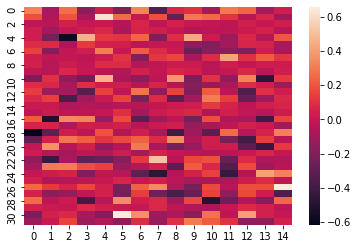

In [17]:
sns.heatmap(mat["W"])

In [18]:
mat["curr_Xtest"].dot(mat["W"])

array([[-0.78642948,  0.24975552, -0.74767472, ..., -0.15436896,
         0.02485356,  0.32091458],
       [-0.67927665,  0.1140717 ,  0.92107112, ...,  0.50781445,
         0.38386506,  0.17694753],
       [-0.23042434, -0.74945707,  0.14182896, ..., -0.15383749,
        -0.36538203,  0.44954306],
       ...,
       [ 0.68598255,  0.71064575, -0.0903902 , ...,  1.52215651,
         0.42688543, -1.31259455],
       [ 0.29331752, -0.39050496,  0.1894201 , ..., -0.59517723,
        -1.12234698, -0.08050052],
       [ 0.9845944 ,  0.62535503,  0.02257601, ...,  0.23189721,
         0.76601195, -0.3620317 ]])

In [19]:
mat["curr_Xtest_low"]

array([[-0.78642948,  0.24975552, -0.74767472, ..., -0.15436896,
         0.02485356,  0.32091458],
       [-0.67927665,  0.1140717 ,  0.92107112, ...,  0.50781445,
         0.38386506,  0.17694753],
       [-0.23042434, -0.74945707,  0.14182896, ..., -0.15383749,
        -0.36538203,  0.44954306],
       ...,
       [ 0.68598255,  0.71064575, -0.0903902 , ...,  1.52215651,
         0.42688543, -1.31259455],
       [ 0.29331752, -0.39050496,  0.1894201 , ..., -0.59517723,
        -1.12234698, -0.08050052],
       [ 0.9845944 ,  0.62535503,  0.02257601, ...,  0.23189721,
         0.76601195, -0.3620317 ]])

In [20]:
frames = []

for dataset_name in dataset_names:

    mat = loadmat(get_data_path(dataset_name))

    for method in methods:
        for projection in projections:
            key = generate_key(method=method, 
                               projection=projection)
            df = make_data(mat, key=key).assign(dataset_name=dataset_name, 
                                                method=method, 
                                                projection=projection)
            frames.append(df)

In [21]:
data1 = pd.concat(frames, axis="index", sort=True)
data1

,dataset_name,error,kw_factor,method,projection,split
0,abalone,1.035861,0.10,KLIEP,none,0
1,abalone,0.984125,0.25,KLIEP,none,0
2,abalone,0.930860,0.50,KLIEP,none,0
3,abalone,0.937177,1.00,KLIEP,none,0
4,abalone,1.026680,2.00,KLIEP,none,0
...,...,...,...,...,...,...
75,puma8,0.323778,1.00,cov,low,9
76,puma8,0.345948,2.00,cov,low,9
77,puma8,0.339254,3.00,cov,low,9
78,puma8,0.334732,5.00,cov,low,9


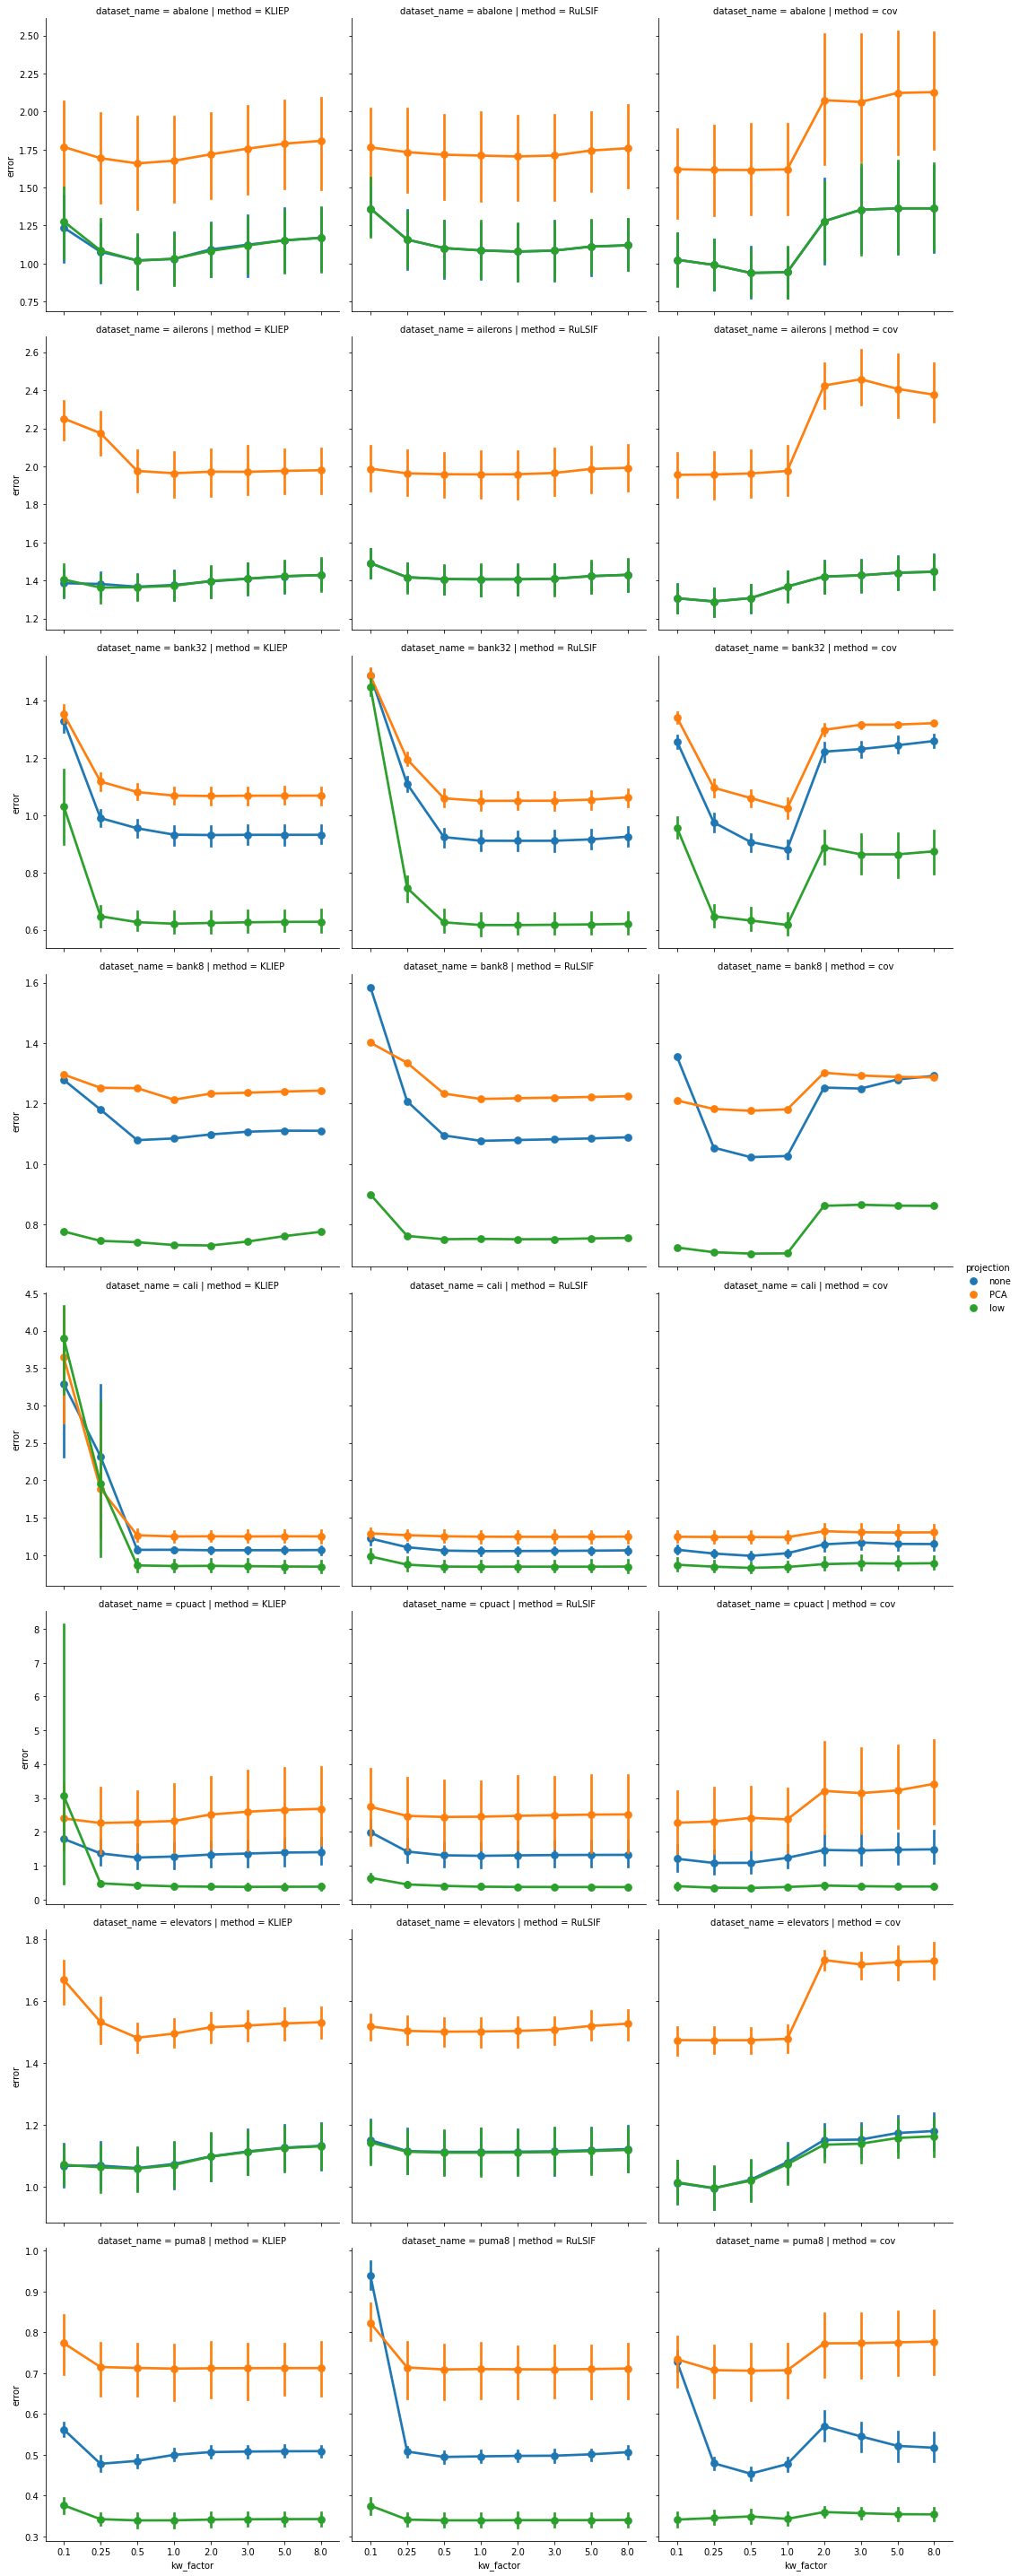

In [22]:
g = sns.catplot(x="kw_factor", y="error", hue="projection",
                row="dataset_name", col="method", 
                kind="point", data=data1, sharey="row")

In [50]:
methods = ["KLIEP", "RuLSIF", "LHSS"]
projections = ["none", "PCA", "low"]

In [51]:
rows = []
for dataset_name in dataset_names:

    mat = loadmat(get_data_path(dataset_name))

    for method in methods:
        
        cv = False if method == "LHSS" else True
        squeeze_axis = 0 if method == "RuLSIF" else -1
#         projections = ["none"] if method in ["ones", "ideal"] else ["none", "PCA", "low"]

        for projection in projections:

            key = generate_key(method=method, cv=cv,
                               projection=projection)

            for split, error in enumerate(mat[key].squeeze(axis=squeeze_axis)):
                row = dict(dataset_name=dataset_name, split=split, kw_factor="cv",
                           method=method, projection=projection, error=error)
                rows.append(row)

In [52]:
data2 = pd.DataFrame(rows)
data2

,dataset_name,split,kw_factor,method,projection,error
0,abalone,0,cv,KLIEP,none,0.917131
1,abalone,1,cv,KLIEP,none,1.228142
2,abalone,2,cv,KLIEP,none,0.628196
3,abalone,3,cv,KLIEP,none,1.537935
4,abalone,4,cv,KLIEP,none,1.410188
...,...,...,...,...,...,...
688,puma8,5,cv,LHSS,low,NaN
689,puma8,6,cv,LHSS,low,NaN
690,puma8,7,cv,LHSS,low,NaN
691,puma8,8,cv,LHSS,low,NaN


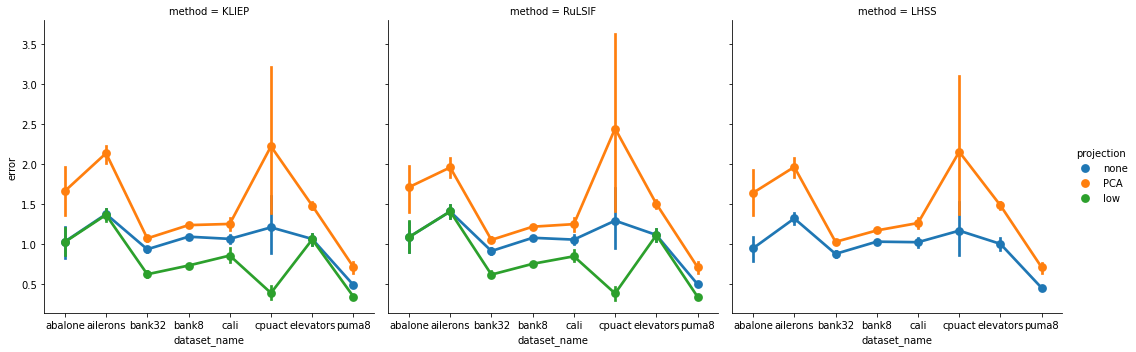

In [53]:
g = sns.catplot(x="dataset_name", y="error", hue="projection",
                col="method", kind="point", data=data2,
                sharey="row")

In [113]:
data = pd.concat([data1, data2], axis="index", sort=True)
data

,dataset_name,error,kw_factor,method,projection,split
0,abalone,1.035861,0.1,KLIEP,none,0
1,abalone,0.984125,0.25,KLIEP,none,0
2,abalone,0.930860,0.5,KLIEP,none,0
3,abalone,0.937177,1,KLIEP,none,0
4,abalone,1.026680,2,KLIEP,none,0
...,...,...,...,...,...,...
688,puma8,NaN,cv,LHSS,low,5
689,puma8,NaN,cv,LHSS,low,6
690,puma8,NaN,cv,LHSS,low,7
691,puma8,NaN,cv,LHSS,low,8


In [114]:
methods = ["ones", "ideal"]
squeeze_axis = -1
projection = "none"

In [115]:
rows = []

for dataset_name in dataset_names:

    mat = loadmat(get_data_path(dataset_name))

    for method in methods:

        key = generate_key(method=method, cv=False, projection=projection)

        for split, error in enumerate(mat[key].squeeze(axis=squeeze_axis)):
            row = dict(dataset_name=dataset_name, split=split, kw_factor="cv",
                       method=method, projection=projection, error=error)
            rows.append(row)

In [116]:
data3 = pd.DataFrame(rows)
data3

,dataset_name,split,kw_factor,method,projection,error
0,abalone,0,cv,ones,none,1.145029
1,abalone,1,cv,ones,none,1.511544
2,abalone,2,cv,ones,none,0.818845
3,abalone,3,cv,ones,none,1.719753
4,abalone,4,cv,ones,none,1.445910
...,...,...,...,...,...,...
155,puma8,5,cv,ideal,none,0.431535
156,puma8,6,cv,ideal,none,0.438454
157,puma8,7,cv,ideal,none,0.408798
158,puma8,8,cv,ideal,none,0.428310


In [117]:
ref = data3.groupby(["dataset_name", "method"]).mean().reset_index()
ref

,dataset_name,method,split,error
0,abalone,ideal,4.5,0.899016
1,abalone,ones,4.5,1.178927
2,ailerons,ideal,4.5,1.291913
3,ailerons,ones,4.5,1.433007
4,bank32,ideal,4.5,0.859074
5,bank32,ones,4.5,0.932000
6,bank8,ideal,4.5,1.008476
7,bank8,ones,4.5,1.111076
8,cali,ideal,4.5,0.982065
9,cali,ones,4.5,1.070897


In [118]:
def fn(dataset_names, **kwargs):

    name = dataset_names.iloc[0]

    ax = plt.gca()
    ax.axhline(ref.query(f"dataset_name == '{name}' and method == 'ideal'").error.iloc[0], c="tab:red")
    ax.axhline(ref.query(f"dataset_name == '{name}' and method == 'ones'").error.iloc[0], c="tab:green")

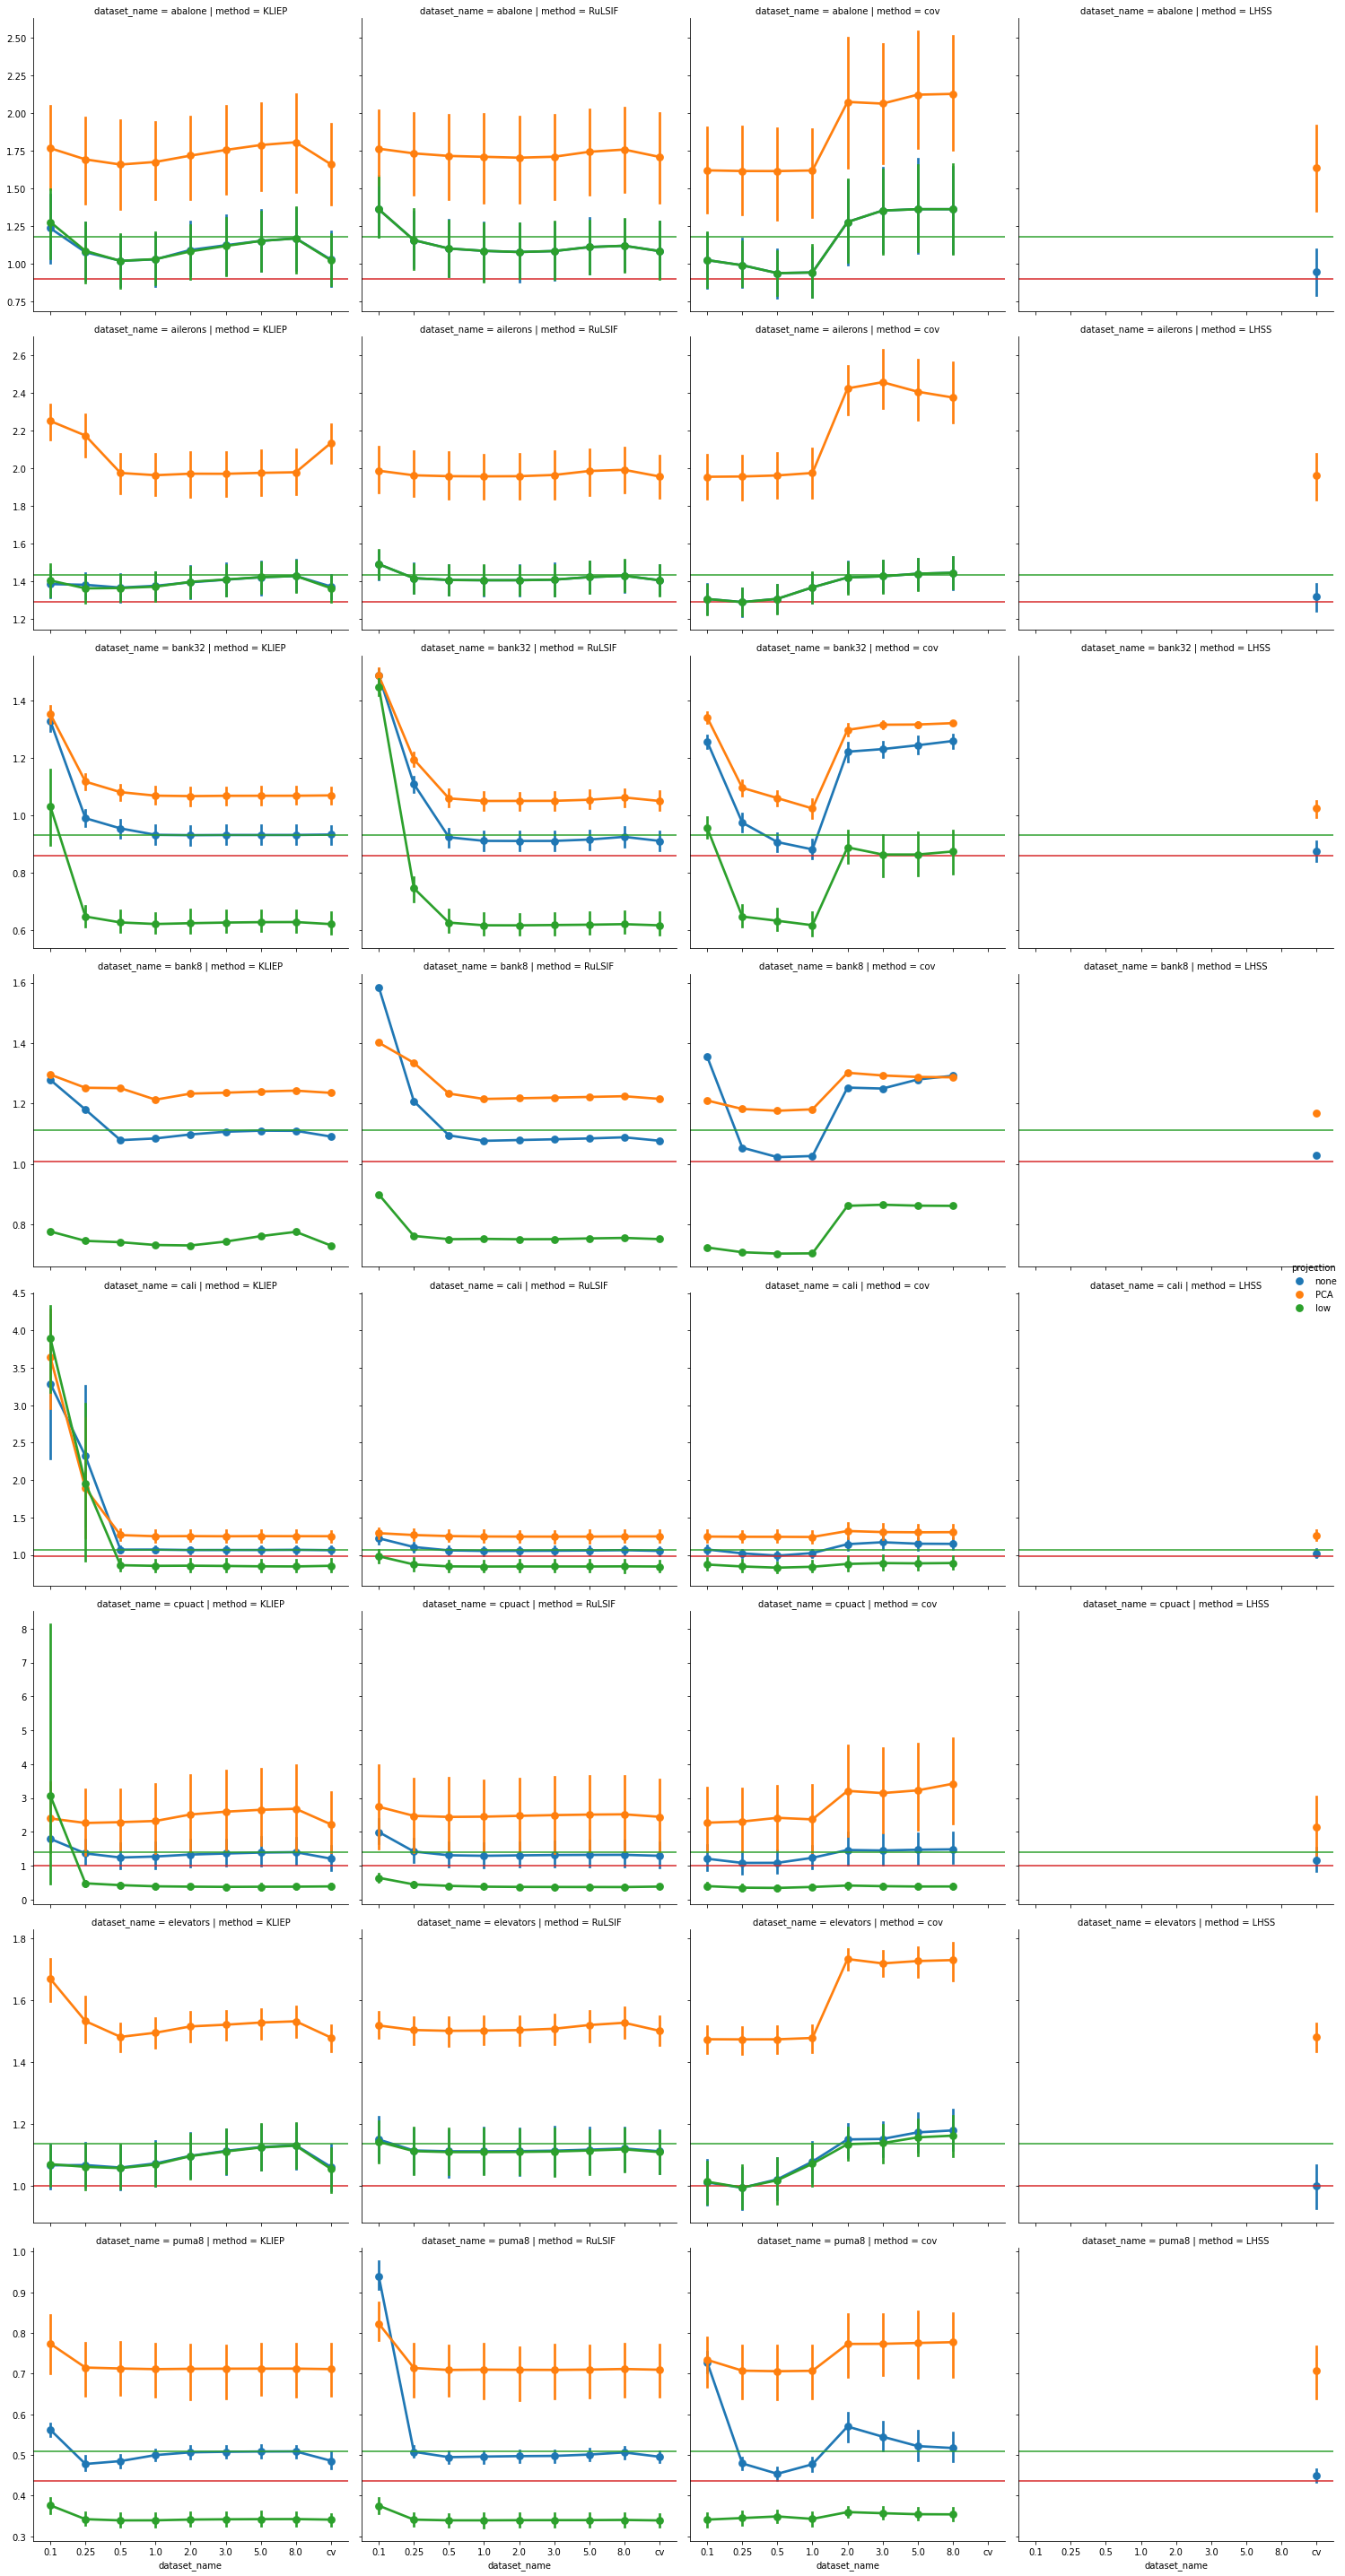

In [119]:
g = sns.catplot(x="kw_factor", y="error", hue="projection",
                row="dataset_name", col="method", 
                kind="point", data=data, sharey="row")
g.map(fn, "dataset_name")
g.savefig("grid.png")
g.savefig("grid.pdf")